In [103]:
import pandas as pd
from pandas import DataFrame, Series 
import scipy as sp
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

train = pd.read_csv("C:/Users/SS/Desktop/titanic/train.csv")
test = pd.read_csv("C:/Users/SS/Desktop/titanic/test.csv")

In [8]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [35]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [33]:
train.info()
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float

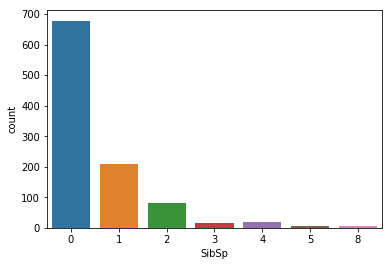

In [16]:
sns.countplot(train['Parch'])
sns.countplot(train.SibSp)

In [32]:
print(train.isnull().sum())
test.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

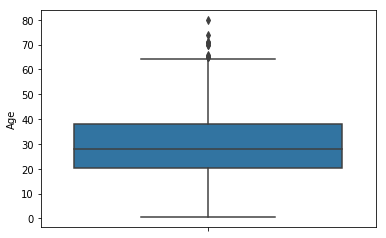

In [24]:
sns.boxplot(train.Age, orient = 'v')

In [25]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

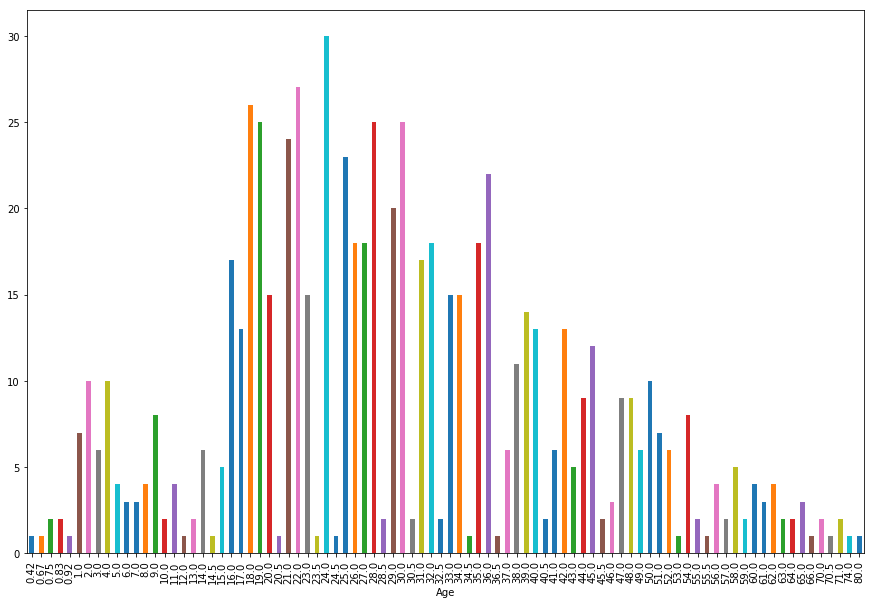

In [44]:
plt.figure(figsize= (15,10))
train.groupby(train.Age).count()['Survived'].plot(kind = 'bar')

In [106]:
train['Age'] = train['Age'].apply(lambda x : 0 if 0<x<10 else x)
train['Age'] = train['Age'].apply(lambda x : 10 if 10<=x<20 else x)
train['Age'] = train['Age'].apply(lambda x : 20 if 20<=x<30 else x)
train['Age'] = train['Age'].apply(lambda x : 30 if 30<=x<40 else x)
train['Age'] = train['Age'].apply(lambda x : 40 if 40<=x<50 else x)
train['Age'] = train['Age'].apply(lambda x : 50 if 50<=x<60 else x)
train['Age'] = train['Age'].apply(lambda x : 60 if 60<=x<70 else x)
train['Age'] = train['Age'].apply(lambda x : 70 if 70<=x<80 else x)
train['Age'] = train['Age'].apply(lambda x : 80 if 80<=x<90 else x)

In [117]:
train[train['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
29,30,0,3,"Todoroff, Mr. Lalio",male,NaN,0,0,349216,7.8958,NaN,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
32,33,1,3,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,7.7500,NaN,Q
36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C
42,43,0,3,"Kraeff, Mr. Theodor",male,NaN,0,0,349253,7.8958,NaN,C


In [118]:
pd.crosstab(train.Age, train.Survived)

Survived,0,1
Age,,
0.0,24,38
10.0,61,41
20.0,143,77
30.0,94,73
40.0,55,34
50.0,28,20
60.0,13,6
70.0,6,0
80.0,0,1


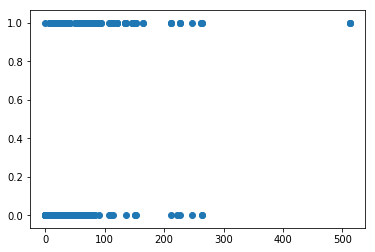

In [120]:
plt.scatter(train.Fare , train.Survived)

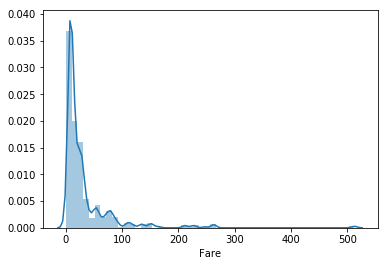

In [123]:
sns.distplot(train.Fare)

In [124]:
train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.038315,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.073029,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.352894,0.083081,0.018443,-0.549500
Age,0.038315,-0.073029,-0.352894,1.000000,-0.300487,-0.189679,0.089421
SibSp,-0.057527,-0.035322,0.083081,-0.300487,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189679,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.089421,0.159651,0.216225,1.000000


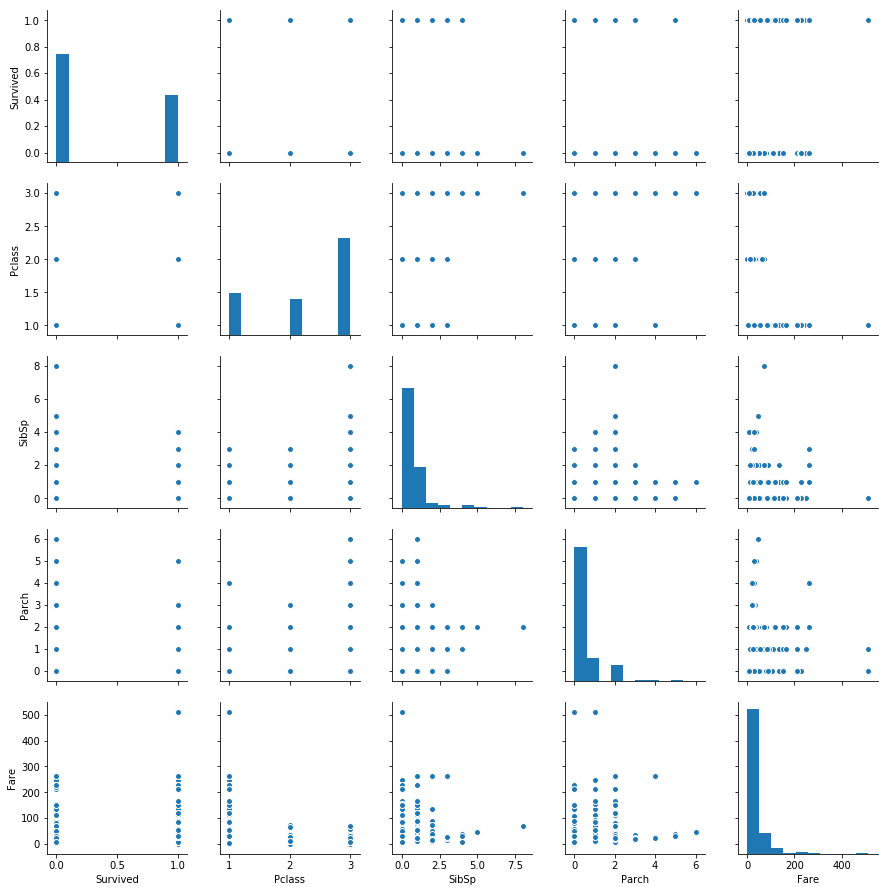

In [128]:
sns.pairplot(train[['Survived','Pclass','SibSp','Parch','Fare']]) #nan 제거

In [129]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,20.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,30.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,20.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,30.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,30.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,50.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,0.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,20.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,10.0,1,0,237736,30.0708,NaN,C


In [133]:
train.groupby(train.Age).count()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Age,,,,,,,,,,,
0.0,62,62,62,62,62,62,62,62,62,10,62
10.0,102,102,102,102,102,102,102,102,102,19,102
20.0,220,220,220,220,220,220,220,220,220,36,220
30.0,167,167,167,167,167,167,167,167,167,50,166
40.0,89,89,89,89,89,89,89,89,89,33,89
50.0,48,48,48,48,48,48,48,48,48,24,48
60.0,19,19,19,19,19,19,19,19,19,10,18
70.0,6,6,6,6,6,6,6,6,6,2,6
80.0,1,1,1,1,1,1,1,1,1,1,1


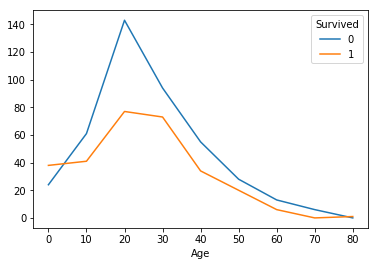

In [135]:
pd.crosstab(train.Age, train.Survived).plot()

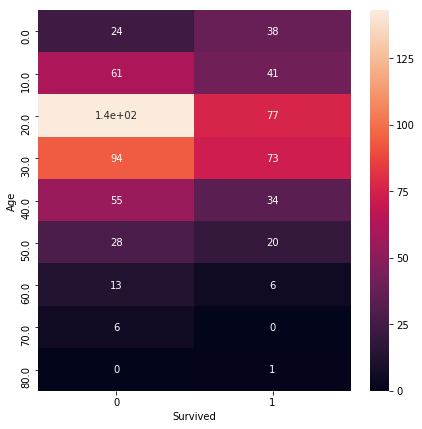

In [139]:
plt.figure(figsize = (7,7))
sns.heatmap(pd.crosstab(train.Age, train.Survived), annot= True)

In [141]:
import pandas as pd
from pandas import DataFrame, Series 
import scipy as sp
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

train = pd.read_csv("C:/Users/SS/Desktop/titanic/train.csv")
test = pd.read_csv("C:/Users/SS/Desktop/titanic/test.csv")

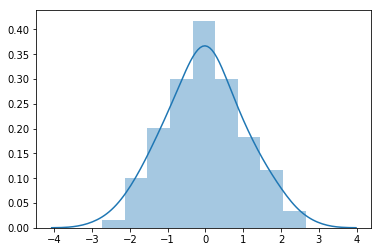

In [151]:
sns.distplot(sp.random.normal(size=(100)))

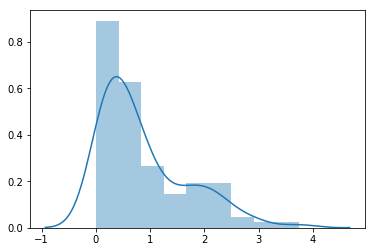

In [153]:
sns.distplot(sp.random.exponential(size=100))

In [155]:
data = pd.DataFrame({'number' : [1,2,3,4,5,6,7,8,9,10] , 'ob' : ['a','b','c','d','e','f','g','f','i','g']})

In [169]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(data[['number']])

MinMaxScaler(copy=True, feature_range=(0, 1))

In [197]:
new = pd.DataFrame(scaler.transform(data[['number']])).rename(columns = {0 : 'number1'})

In [198]:
new = new.reset_index().drop('index', axis =1 )
new

,number1
0,0.000000
1,0.111111
2,0.222222
3,0.333333
4,0.444444
5,0.555556
6,0.666667
7,0.777778
8,0.888889
9,1.000000


In [204]:
pd.concat([new, data] , axis = 1).drop('number', axis =1 ).rename(columns = {'number1' : 'number'})

,number,ob
0,0.000000,a
1,0.111111,b
2,0.222222,c
3,0.333333,d
4,0.444444,e
5,0.555556,f
6,0.666667,g
7,0.777778,f
8,0.888889,i
9,1.000000,g


In [218]:
data1 = pd.get_dummies(data)
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

In [219]:
scaler = RobustScaler()
scaler.fit(data1)
scaler.transform(data1).shape
pd.DataFrame(scaler.transform(data1))

,0,1,2,3,4,5,6,7,8
0,-1.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.777778,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.555556,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,-0.333333,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,-0.111111,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,0.111111,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7,0.555556,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8,0.777778,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [212]:
data1

,number,ob_a,ob_b,ob_c,ob_d,ob_e,ob_f,ob_g,ob_i
0,1,1,0,0,0,0,0,0,0
1,2,0,1,0,0,0,0,0,0
2,3,0,0,1,0,0,0,0,0
3,4,0,0,0,1,0,0,0,0
4,5,0,0,0,0,1,0,0,0
5,6,0,0,0,0,0,1,0,0
6,7,0,0,0,0,0,0,1,0
7,8,0,0,0,0,0,1,0,0
8,9,0,0,0,0,0,0,0,1
9,10,0,0,0,0,0,0,1,0


In [214]:
pd.DataFrame(scaler.transform(data1))

,0,1,2,3,4,5,6,7,8
0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.111111,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.222222,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.333333,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.444444,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,0.555556,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6,0.666667,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7,0.777778,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8,0.888889,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [221]:
train.isnull().sum().sum()

866

In [224]:
(train.isnull().sum() / train.isnull().sum().sum() ) *100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.438799
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          79.330254
Embarked        0.230947
dtype: float64

In [239]:
a = pd.DataFrame(train.isnull().sum())

In [227]:
len(train)

891

In [228]:
train.isnull().sum().sum() 

866

In [232]:
b = pd.DataFrame((train.isnull().sum() / train.isnull().sum().sum() ) *100)

In [236]:
b = b.rename(columns = {0 : 'percent'})

In [240]:
pd.concat([a,b] , axis =1 )

,0,percent
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
Age,177,20.438799
SibSp,0,0.000000
Parch,0,0.000000
Ticket,0,0.000000
Fare,0,0.000000


In [242]:
train[train.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [243]:
pd.crosstab(train.Embarked, train.Pclass)

Pclass,1,2,3
Embarked,,,
C,85,17,66
Q,2,3,72
S,127,164,353


In [252]:
plt.figure(figsize = (10, 10))
sns.boxplot(train.Embarked, train.Fare , hue = train.Pclass)

SyntaxError: positional argument follows keyword argument (<ipython-input-252-46090c14a815>, line 2)

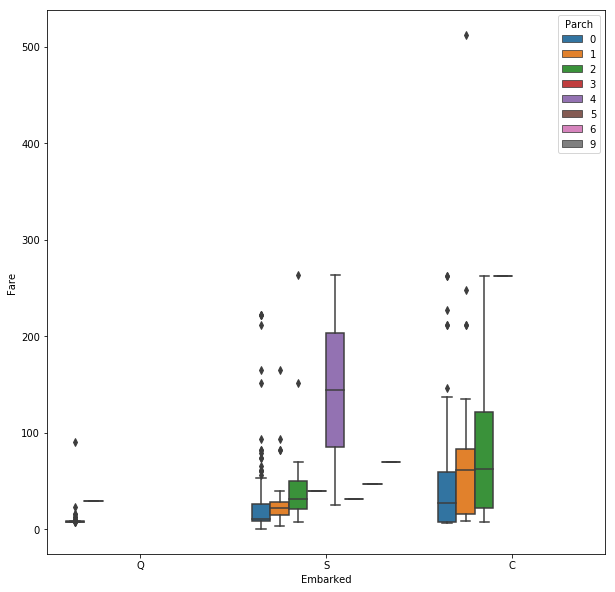

In [254]:
plt.figure(figsize = (10, 10))
sns.boxplot(test.Embarked, test.Fare , hue = test.Parch)

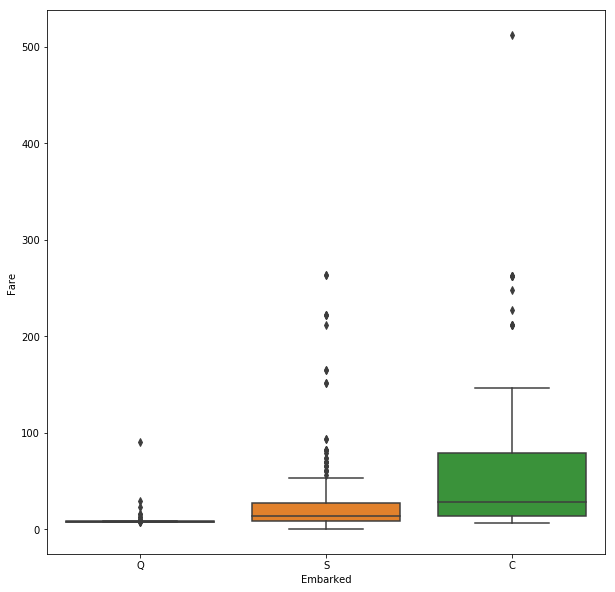

In [250]:
plt.figure(figsize = (10, 10))
sns.boxplot(test.Embarked, test.Fare ) 

In [258]:
train.Embarked.fillna('C', inplace = True)

In [259]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [260]:
train.Cabin

0              NaN
1              C85
2              NaN
3             C123
4              NaN
5              NaN
6              E46
7              NaN
8              NaN
9              NaN
10              G6
11            C103
12             NaN
13             NaN
14             NaN
15             NaN
16             NaN
17             NaN
18             NaN
19             NaN
20             NaN
21             D56
22             NaN
23              A6
24             NaN
25             NaN
26             NaN
27     C23 C25 C27
28             NaN
29             NaN
          ...     
861            NaN
862            D17
863            NaN
864            NaN
865            NaN
866            NaN
867            A24
868            NaN
869            NaN
870            NaN
871            D35
872    B51 B53 B55
873            NaN
874            NaN
875            NaN
876            NaN
877            NaN
878            NaN
879            C50
880            NaN
881            NaN
882         

In [263]:
survivers = train.Survived

train.drop(["Survived"],axis=1, inplace=True)

all_data = pd.concat([train,test], ignore_index=True)

## Assign all the null values to N
all_data.Cabin.fillna("N", inplace=True)

AttributeError: 'DataFrame' object has no attribute 'Survived'

In [323]:
import pandas as pd
from pandas import DataFrame, Series 
import scipy as sp
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

train = pd.read_csv("C:/Users/SS/Desktop/titanic/train.csv")
test = pd.read_csv("C:/Users/SS/Desktop/titanic/test.csv")

train.Embarked.fillna('C', inplace = True)

survivers = train.Survived

train.drop(["Survived"],axis=1, inplace=True)

all_data = pd.concat([train,test], ignore_index=False)

## Assign all the null values to N
all_data.Cabin.fillna("N", inplace=True)
all_data.Cabin = [i[0] for i in all_data.Cabin] # all_data.Cabin = all_data.Cabin.apply(lambda x : x[0])

with_N = all_data[all_data.Cabin == "N"]

without_N = all_data[all_data.Cabin != "N"]

all_data.groupby('Cabin')['Fare'].mean().sort_values()


def cabin_estimator(i):
    
    if i<16:
        a = "G"
    elif i>=16 and i<27:
        a = "F"
    elif i>=27 and i<38:
        a = "T"
    elif i>=38 and i<47:
        a = "A"
    elif i>= 47 and i<53:
        a = "E"
    elif i>= 53 and i<54:
        a = "D"
    elif i>=54 and i<116:
        a = 'C'
    else:
        a = "B"
    return a

with_N['Cabin'] = with_N['Fare'].apply(lambda x :cabin_estimator(x))

all_data = pd.concat([with_N, without_N], axis = 0 )
all_data.sort_values(by = 'PassengerId', inplace=True)

train = all_data[ : 891]
test = all_data[891 : ]

train['Survived'] = survivers

missing_value = test[(test.Pclass ==3) & (test.Sex == 'male') & (test.Embarked == 'S')].Fare.mean()
test['Fare'].fillna(missing_value, inplace = True)

C:\Users\SS\Anaconda31\lib\site-packages\ipykernel\__main__.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\SS\Anaconda31\lib\site-packages\ipykernel\__main__.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [320]:
train.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
Survived         0
dtype: int64

In [331]:
test.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            0
Cabin           0
Embarked        0
dtype: int64

In [326]:
test[test.Fare.isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,B,S


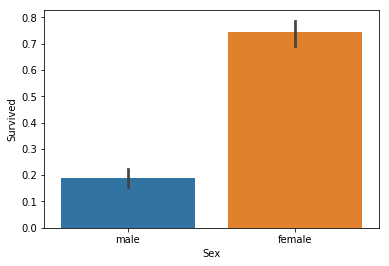

In [332]:
sns.barplot(train.Sex, train.Survived)

In [333]:
pd.crosstab(train.Sex, train.Survived)

Survived,0,1
Sex,,
female,81,233
male,468,109


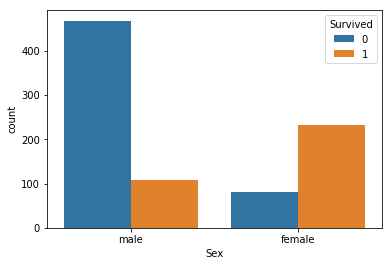

In [337]:
sns.countplot(train.Sex, hue = train.Survived)

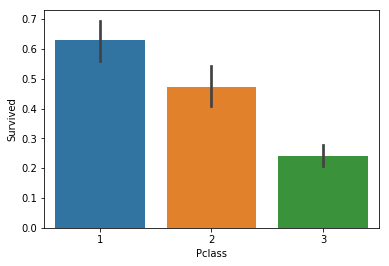

In [338]:
sns.barplot(train.Pclass, train.Survived)

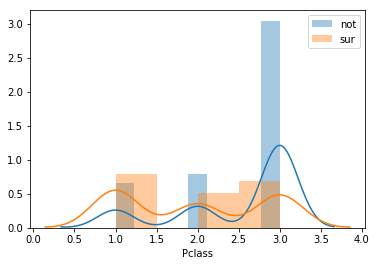

In [345]:
sns.distplot(train.Pclass[train.Survived == 0] , label = 'not')
sns.distplot(train.Pclass[train.Survived == 1] , label = 'sur')
plt.legend()

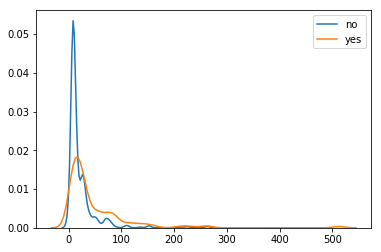

In [350]:
sns.kdeplot(train[train.Survived ==0].Fare, label = 'no')
sns.kdeplot(train[train.Survived ==1].Fare, label = 'yes')

C:\Users\SS\Anaconda31\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
C:\Users\SS\Anaconda31\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


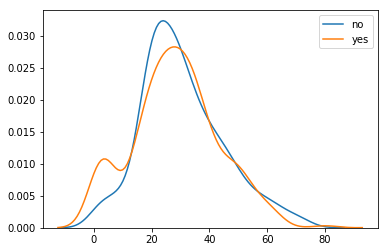

In [352]:
sns.kdeplot(train[train.Survived ==0].Age, label = 'no')
sns.kdeplot(train[train.Survived ==1].Age, label = 'yes')

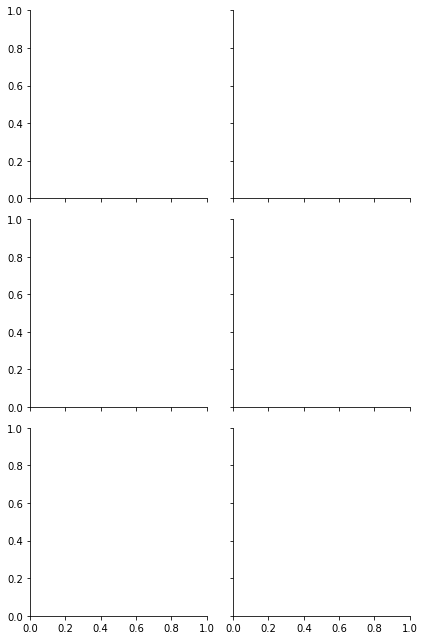

In [357]:
pal = {1:"seagreen", 0:"gray"}
sns.FacetGrid(train, col="Sex", row="Embarked", hue = "Survived", palette = pal)

In [358]:
train.corr()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
PassengerId,1.000000,-0.035144,0.036847,-0.057527,-0.001652,0.012658,-0.005007
Pclass,-0.035144,1.000000,-0.369226,0.083081,0.018443,-0.549500,-0.338481
Age,0.036847,-0.369226,1.000000,-0.308247,-0.189119,0.096067,-0.077221
SibSp,-0.057527,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.035322
Parch,-0.001652,0.018443,-0.189119,0.414838,1.000000,0.216225,0.081629
Fare,0.012658,-0.549500,0.096067,0.159651,0.216225,1.000000,0.257307
Survived,-0.005007,-0.338481,-0.077221,-0.035322,0.081629,0.257307,1.000000
